In [20]:
import os

In [21]:
os.getcwd()

'D:\\insurance-premium-prediction\\dataset'

In [22]:
os.chdir("D:\insurance-premium-prediction\dataset")

In [23]:
os.getcwd()

'D:\\insurance-premium-prediction\\dataset'

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   object  
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   object  
 5   region    1338 non-null   object  
 6   expenses  1338 non-null   float64 
 7   bmi_cat   1338 non-null   category
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 74.8+ KB


In [49]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [50]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [51]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [26]:
df['bmi'].value_counts()

27.6    17
33.3    17
28.9    16
32.3    15
29.8    14
        ..
39.0     1
40.8     1
20.3     1
18.5     1
53.1     1
Name: bmi, Length: 275, dtype: int64

<AxesSubplot:>

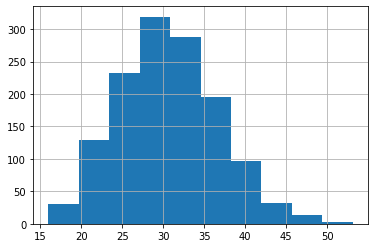

In [27]:
df.bmi.hist()

In [28]:
df["bmi_cat"] = pd.cut(df["bmi"],
                                bins=[15.0, 25.0, 35.0, 45.0,np.inf],
                                labels=[1,2,3,4])

In [29]:
df.drop(["bmi_cat"], axis=1)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [30]:
df

,age,sex,bmi,children,smoker,region,expenses,bmi_cat
0,19,female,27.9,0,yes,southwest,16884.92,2
1,18,male,33.8,1,no,southeast,1725.55,2
2,28,male,33.0,3,no,southeast,4449.46,2
3,33,male,22.7,0,no,northwest,21984.47,1
4,32,male,28.9,0,no,northwest,3866.86,2
...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,2
1334,18,female,31.9,0,no,northeast,2205.98,2
1335,18,female,36.9,0,no,southeast,1629.83,3
1336,21,female,25.8,0,no,southwest,2007.95,2


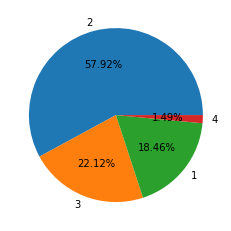

In [45]:
plt.pie(df.bmi_cat.value_counts(), labels=df.bmi_cat.value_counts().index, autopct = '%1.2f%%')
plt.show()

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit

In [38]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [39]:
for train_ix, test_ix in split.split(df, df['bmi_cat']):
    print(train_ix, test_ix)

[ 965 1193 1151 ...  402  572  705] [1154  401  233  759  465  437  318 1111 1330   96  799 1333 1136 1060
  357  413  802 1312  675  220   39  470  443  718  188 1235  674  927
   20  576   67 1048  673  753  875 1093  964    9 1134  628  730 1108
  683 1320  304  478  564 1238  302  952  481  534  157 1192  709  703
  526   25  298  689   31 1133  762 1288  364  504  206 1130 1021  291
  192 1276  664 1260  383   49 1063  594  236  540 1303  907 1068 1332
  557 1131  605  831  461 1336   85 1220 1194  667  314  879  681 1182
  750 1045  844  643  882 1041 1091  271  517 1263  235  814 1289  371
 1167 1308  301  835 1148  424  820 1297  560  529  896 1071  640  881
  400  843  992  908  261   88  887  957 1184  815  471  555 1011   65
  500   71  403  660  617  428  185   92 1145  429  210  269  326   94
  426  374   60  888  890  254  996    1  655 1036 1110  528 1009 1269
  492  128  253  931  775  116  603 1171  923  669   81  475 1107  670
 1140  213 1137  721   15  569  781  573 

In [41]:
train_df = df.loc[train_ix]
train_df

,age,sex,bmi,children,smoker,region,expenses,bmi_cat
965,35,male,27.1,1,no,southwest,4746.34,2
1193,48,female,36.6,0,no,northwest,8671.19,3
1151,58,female,36.5,0,no,northwest,12235.84,3
842,23,female,32.8,2,yes,southeast,36021.01,2
971,34,female,23.6,0,no,northeast,4992.38,1
...,...,...,...,...,...,...,...,...
1291,19,male,34.9,0,yes,southwest,34828.65,2
112,37,male,30.8,0,no,southwest,4646.76,2
402,64,female,33.0,0,no,northwest,14692.67,2
572,30,female,43.1,2,no,southeast,4753.64,3


In [42]:
test_df = df.loc[test_ix]
test_df

,age,sex,bmi,children,smoker,region,expenses,bmi_cat
1154,48,female,27.9,4,no,northwest,11015.17,2
401,47,male,47.5,1,no,southeast,8083.92,4
233,59,male,27.5,1,no,southwest,12333.83,2
759,18,male,38.2,0,yes,southeast,36307.80,3
465,30,female,28.4,1,yes,southeast,19521.97,2
...,...,...,...,...,...,...,...,...
338,50,male,32.3,1,yes,northeast,41919.10,2
1322,62,male,38.8,0,no,southeast,12981.35,3
1305,24,female,27.7,0,no,southeast,2464.62,2
946,42,male,35.8,2,no,southwest,7160.09,3


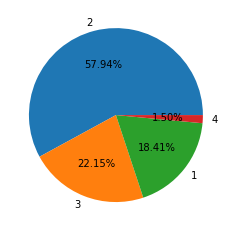

In [44]:
plt.pie(train_df.bmi_cat.value_counts(), labels=train_df.bmi_cat.value_counts().index, autopct = '%1.2f%%')
plt.show()

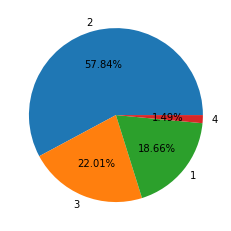

In [46]:
plt.pie(test_df.bmi_cat.value_counts(), labels=test_df.bmi_cat.value_counts().index, autopct = '%1.2f%%')
plt.show()

In [48]:
df.drop(['bmi_cat'], axis=1)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
